In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import unicodedata
import re
import os
import zipfile
import json
import time, requests
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import norm
from urllib.parse import urlparse

In [2]:
df_worker8 = pd.read_csv("../perf_summary.csv")
df_worker8

,datasetId,sourcePath,executedAt,fileSizeBytes,read_df_sec,semantic_helper_sec,classify_attributes_sec,scopes_granularities_sec,find_common_theme_sec,transform_result_sec,total_sec
0,f9e88e98e4b3d867,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:40+00:00,5748653,4.013842,172.535127,2.395107,0.020881,0.000037,0.000118,179.050822
1,da92442100fafde4,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:39+00:00,137980879,7.545622,182.362300,18.951372,0.271842,0.000061,0.000147,209.152507
2,8f21ffa7f50b3670,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:29+00:00,232573814,15.535468,195.670611,23.779370,0.769171,0.000012,0.000135,235.772304
3,61b7bda5bfebbcc0,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:21:52+00:00,121002259,12.619239,189.070536,10.467902,0.361139,0.000045,0.000100,212.553896
4,ef5ed0774d91ffa7,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:36+00:00,122935185,6.483960,163.340179,14.051339,0.471816,0.000039,0.000103,184.400337
5,d431244cc3da3dd8,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:28+00:00,169002120,40.270602,193.868094,16.298859,0.731266,0.000048,0.000125,251.180063
6,fb057ee6885d5a8d,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:09+00:00,71438571,6.530862,184.030570,15.023613,0.799236,0.000084,0.000186,206.423630
7,64a807f990870a54,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:07+00:00,232356369,16.223089,224.606549,38.072735,1.135266,0.000058,0.000169,280.164734
8,87a6e7a3a3c40aff,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:41+00:00,92206119,26.491414,155.810473,13.526075,0.445993,0.000054,0.000162,196.340502
9,b18d514cd2c5163f,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:08+00:00,116890193,8.116721,205.881103,11.428759,0.437112,0.000173,0.000359,225.895449


In [3]:
# raw_dir = "../raw"  # 你的 Raw 目录
# os.makedirs(raw_dir, exist_ok=True)
# 
# def download_timed(url, outdir=raw_dir, repeats=3, chunk=1024*1024):
#     """下载 URL 到 outdir，重复多次取中位数耗时（秒），并返回大小（MB）。"""
#     times = []
#     size_mb = None
#     name = os.path.basename(urlparse(url).path) or "download.bin"
# 
#     for i in range(repeats):
#         out = os.path.join(outdir, f"{i}_{name}")  # 防止缓存
#         t0 = time.perf_counter()
#         sz = 0
#         with requests.get(url, stream=True, timeout=60) as r:
#             r.raise_for_status()
#             with open(out, "wb") as f:
#                 for chunk_bytes in r.iter_content(chunk_size=chunk):
#                     if chunk_bytes:
#                         f.write(chunk_bytes)
#                         sz += len(chunk_bytes)
#         t1 = time.perf_counter()
#         times.append(t1 - t0)
#         size_mb = sz / (1024**2)
#         os.remove(out)
#         time.sleep(1.0)
# 
#     times.sort()
#     median_s = times[len(times)//2]
#     return median_s, size_mb, name
# 
# 
# # 示例：对一组 URL 批量测量
# urls = [
#     "https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-adresse-et-geolocalisation-etablissements-premier-et-second-degre/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B",
#     "https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-annuaire-education/exports/json?lang=fr&timezone=Europe%2FBerlin",
#     "https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-deploiemement_tedi/exports/parquet?lang=fr&timezone=Europe%2FBerlin",
#     "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/medecins/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B",
#     "https://www.data.gouv.fr/api/1/datasets/r/686edae0-fd05-48e2-830a-a4bc05e4dec8",
#     "https://www.data.gouv.fr/api/1/datasets/r/3f73d129-6b24-45cd-95e9-9bacc216d9d9",
#     "https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-data-es-base-de-donnees/exports/csv?lang=fr&timezone=Europe%2FBerlin&use_labels=true&delimiter=%3B",
#     "https://data.education.gouv.fr/api/explore/v2.1/catalog/datasets/fr-en-annuaire-education/exports/geojson?lang=fr&timezone=Europe%2FBerlin"
# ]
# 
# rows = []
# for u in urls:
#     t_s, size_mb, fname = download_timed(u)
#     rows.append({
#         "file_name": fname,
#         "url": u,
#         "file_size_MB": size_mb,
#         "T_transfer_s": t_s
#     })
# 
# df_transfer = pd.DataFrame(rows)
# df_transfer.to_csv("../visualisation/transfer_times_8.csv", index=False)
# df_transfer

In [4]:
# 你的测量数据 (6个文件)
df_measured = pd.read_csv("../visualisation/transfer_times_8.csv")  # 包含 url, file_size_MB, T_transfer_s
df_measured.rename(columns={"T_transfer_s":"transfer_sec"}, inplace=True)
df_measured.rename(columns={"file_size_MB": "fileSizeMB"}, inplace=True)
df_measured

,file_name,url,fileSizeMB,transfer_sec
0,csv,https://data.education.gouv.fr/api/explore/v2....,26.113591,8.564913
1,json,https://data.education.gouv.fr/api/explore/v2....,145.167353,12.381062
2,parquet,https://data.education.gouv.fr/api/explore/v2....,0.108717,0.708134
3,csv,https://public.opendatasoft.com/api/explore/v2...,1531.475336,15.041473
4,686edae0-fd05-48e2-830a-a4bc05e4dec8,https://www.data.gouv.fr/api/1/datasets/r/686e...,81.685614,2.680773
5,3f73d129-6b24-45cd-95e9-9bacc216d9d9,https://www.data.gouv.fr/api/1/datasets/r/3f73...,20.692914,1.079043
6,csv,https://data.education.gouv.fr/api/explore/v2....,303.749529,93.127366
7,geojson,https://data.education.gouv.fr/api/explore/v2....,139.025014,14.921413


In [5]:
df_measured=df_measured[["url", "fileSizeMB", "transfer_sec"]]
df_measured["domain"] = df_measured["url"].apply(
    lambda u: urlparse(u).netloc if isinstance(u, str) and u.startswith("http") else "local"
)

df_measured

,url,fileSizeMB,transfer_sec,domain
0,https://data.education.gouv.fr/api/explore/v2....,26.113591,8.564913,data.education.gouv.fr
1,https://data.education.gouv.fr/api/explore/v2....,145.167353,12.381062,data.education.gouv.fr
2,https://data.education.gouv.fr/api/explore/v2....,0.108717,0.708134,data.education.gouv.fr
3,https://public.opendatasoft.com/api/explore/v2...,1531.475336,15.041473,public.opendatasoft.com
4,https://www.data.gouv.fr/api/1/datasets/r/686e...,81.685614,2.680773,www.data.gouv.fr
5,https://www.data.gouv.fr/api/1/datasets/r/3f73...,20.692914,1.079043,www.data.gouv.fr
6,https://data.education.gouv.fr/api/explore/v2....,303.749529,93.127366,data.education.gouv.fr
7,https://data.education.gouv.fr/api/explore/v2....,139.025014,14.921413,data.education.gouv.fr


In [6]:
df_url = pd.read_excel("../ref/dataset&source.xlsx")
df_worker8["fileSizeMB"] = df_worker8["fileSizeBytes"] / (1024 ** 2)
# 全部文件
df_all = pd.merge(df_worker8, df_url,on="sourcePath", how ="left") # 包含 file_size_MB, url
df_all

,datasetId,sourcePath,executedAt,fileSizeBytes,read_df_sec,semantic_helper_sec,classify_attributes_sec,scopes_granularities_sec,find_common_theme_sec,transform_result_sec,total_sec,fileSizeMB,url
0,f9e88e98e4b3d867,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:40+00:00,5748653,4.013842,172.535127,2.395107,0.020881,0.000037,0.000118,179.050822,5.482343,NaN
1,da92442100fafde4,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:39+00:00,137980879,7.545622,182.362300,18.951372,0.271842,0.000061,0.000147,209.152507,131.588820,NaN
2,8f21ffa7f50b3670,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:29+00:00,232573814,15.535468,195.670611,23.779370,0.769171,0.000012,0.000135,235.772304,221.799673,NaN
3,61b7bda5bfebbcc0,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:21:52+00:00,121002259,12.619239,189.070536,10.467902,0.361139,0.000045,0.000100,212.553896,115.396747,NaN
4,ef5ed0774d91ffa7,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:36+00:00,122935185,6.483960,163.340179,14.051339,0.471816,0.000039,0.000103,184.400337,117.240129,NaN
5,d431244cc3da3dd8,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:28+00:00,169002120,40.270602,193.868094,16.298859,0.731266,0.000048,0.000125,251.180063,161.172981,NaN
6,fb057ee6885d5a8d,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:09+00:00,71438571,6.530862,184.030570,15.023613,0.799236,0.000084,0.000186,206.423630,68.129130,NaN
7,64a807f990870a54,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:07+00:00,232356369,16.223089,224.606549,38.072735,1.135266,0.000058,0.000169,280.164734,221.592301,NaN
8,87a6e7a3a3c40aff,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:41+00:00,92206119,26.491414,155.810473,13.526075,0.445993,0.000054,0.000162,196.340502,87.934608,NaN
9,b18d514cd2c5163f,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:08+00:00,116890193,8.116721,205.881103,11.428759,0.437112,0.000173,0.000359,225.895449,111.475175,NaN


In [7]:
# 增加域名列
df_all["domain"] = df_all["url"].apply(
    lambda u: urlparse(u).netloc if isinstance(u, str) and u.startswith("http") else "local"
)
df_all

,datasetId,sourcePath,executedAt,fileSizeBytes,read_df_sec,semantic_helper_sec,classify_attributes_sec,scopes_granularities_sec,find_common_theme_sec,transform_result_sec,total_sec,fileSizeMB,url,domain
0,f9e88e98e4b3d867,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:40+00:00,5748653,4.013842,172.535127,2.395107,0.020881,0.000037,0.000118,179.050822,5.482343,NaN,local
1,da92442100fafde4,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:39+00:00,137980879,7.545622,182.362300,18.951372,0.271842,0.000061,0.000147,209.152507,131.588820,NaN,local
2,8f21ffa7f50b3670,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:29+00:00,232573814,15.535468,195.670611,23.779370,0.769171,0.000012,0.000135,235.772304,221.799673,NaN,local
3,61b7bda5bfebbcc0,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:21:52+00:00,121002259,12.619239,189.070536,10.467902,0.361139,0.000045,0.000100,212.553896,115.396747,NaN,local
4,ef5ed0774d91ffa7,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:36+00:00,122935185,6.483960,163.340179,14.051339,0.471816,0.000039,0.000103,184.400337,117.240129,NaN,local
5,d431244cc3da3dd8,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:28+00:00,169002120,40.270602,193.868094,16.298859,0.731266,0.000048,0.000125,251.180063,161.172981,NaN,local
6,fb057ee6885d5a8d,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:09+00:00,71438571,6.530862,184.030570,15.023613,0.799236,0.000084,0.000186,206.423630,68.129130,NaN,local
7,64a807f990870a54,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:07+00:00,232356369,16.223089,224.606549,38.072735,1.135266,0.000058,0.000169,280.164734,221.592301,NaN,local
8,87a6e7a3a3c40aff,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:41+00:00,92206119,26.491414,155.810473,13.526075,0.445993,0.000054,0.000162,196.340502,87.934608,NaN,local
9,b18d514cd2c5163f,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:08+00:00,116890193,8.116721,205.881103,11.428759,0.437112,0.000173,0.000359,225.895449,111.475175,NaN,local


In [8]:
# === 0) 合并 all 和 measured ===
# measured 里取每个 url 的最新 / 最小 / 平均 transfer_sec（根据需求）
df_meas_agg = (
    df_measured[["url", "transfer_sec"]]
    .rename(columns={"transfer_sec": "transfer_measured_sec"})
)

df_all = df_all.merge(df_meas_agg, on="url", how="left")

# === 1) 计算全局吞吐量作为回退值 ===
throughput_global = df_measured["fileSizeMB"].sum() / df_measured["transfer_sec"].sum()

# === 2) 按域名拟合参数 (L0, MBps) ===
rows = []
for dom, g in df_measured.groupby("domain"):
    x = g["fileSizeMB"].values
    y = g["transfer_sec"].values
    if dom != "local" and len(g) >= 2 and (x >= 1.0).sum() >= 1:
        mask = x >= 1.0
        x_fit = x[mask] if mask.any() else x
        y_fit = y[mask] if mask.any() else y
        a, b = np.polyfit(x_fit, y_fit, 1)        # y ≈ a + b*x
        L0 = max(float(a), 0.0)
        MBps = float(1.0/b) if b > 0 else float(x.sum()/y.sum())
    elif dom == "local":
        # 本地文件：自定义本地 I/O 带宽
        L0, MBps = 0.0, 2
    else:
        # 样本不足：回退为加权平均
        L0 = 0.0
        MBps = float(x.sum()/y.sum())
    rows.append({"domain": dom, "L0_s": L0, "MBps": MBps})

df_params = pd.DataFrame(rows, columns=["domain","L0_s","MBps"])

# === 3) 合并域名参数并计算估算值 ===
df_all = df_all.merge(df_params, on="domain", how="left")
df_all["L0_s"] = df_all["L0_s"].fillna(0.0)
df_all["MBps"] = df_all["MBps"].fillna(throughput_global)

df_all["transfer_est_sec"] = df_all["L0_s"] + df_all["fileSizeMB"] / df_all["MBps"]

# === 4) 决定最终耗时：优先实测 ===
df_all["transfer_final_sec"] = np.where(
    df_all["transfer_measured_sec"].notna(),
    df_all["transfer_measured_sec"],
    df_all["transfer_est_sec"]
)
df_all["transfer_source"] = np.where(
    df_all["transfer_measured_sec"].notna(), "measured", "estimated"
)

# === 5) 保存与预览 ===
cols_to_save = ["url","domain","fileSizeMB","L0_s","MBps",
                "transfer_measured_sec","transfer_est_sec",
                "transfer_final_sec","transfer_source"]
# df_all[cols_to_save].to_csv("../visualisation/transfer_estimated_mixed.csv", index=False)
df_all[["url","domain","fileSizeMB","transfer_final_sec","transfer_source"]]


,url,domain,fileSizeMB,transfer_final_sec,transfer_source
0,NaN,local,5.482343,0.362164,estimated
1,NaN,local,131.588820,8.692764,estimated
2,NaN,local,221.799673,14.652097,estimated
3,NaN,local,115.396747,7.623114,estimated
4,NaN,local,117.240129,7.744888,estimated
5,NaN,local,161.172981,10.647095,estimated
6,NaN,local,68.129130,4.500613,estimated
7,NaN,local,221.592301,14.638398,estimated
8,NaN,local,87.934608,5.808964,estimated
9,NaN,local,111.475175,7.364055,estimated


In [9]:
df_worker8 = df_all.copy()
df_worker8

,datasetId,sourcePath,executedAt,fileSizeBytes,read_df_sec,semantic_helper_sec,classify_attributes_sec,scopes_granularities_sec,find_common_theme_sec,transform_result_sec,total_sec,fileSizeMB,url,domain,transfer_measured_sec,L0_s,MBps,transfer_est_sec,transfer_final_sec,transfer_source
0,f9e88e98e4b3d867,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:40+00:00,5748653,4.013842,172.535127,2.395107,0.020881,0.000037,0.000118,179.050822,5.482343,NaN,local,NaN,0.000000,15.137743,0.362164,0.362164,estimated
1,da92442100fafde4,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:39+00:00,137980879,7.545622,182.362300,18.951372,0.271842,0.000061,0.000147,209.152507,131.588820,NaN,local,NaN,0.000000,15.137743,8.692764,8.692764,estimated
2,8f21ffa7f50b3670,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:29+00:00,232573814,15.535468,195.670611,23.779370,0.769171,0.000012,0.000135,235.772304,221.799673,NaN,local,NaN,0.000000,15.137743,14.652097,14.652097,estimated
3,61b7bda5bfebbcc0,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:21:52+00:00,121002259,12.619239,189.070536,10.467902,0.361139,0.000045,0.000100,212.553896,115.396747,NaN,local,NaN,0.000000,15.137743,7.623114,7.623114,estimated
4,ef5ed0774d91ffa7,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:36+00:00,122935185,6.483960,163.340179,14.051339,0.471816,0.000039,0.000103,184.400337,117.240129,NaN,local,NaN,0.000000,15.137743,7.744888,7.744888,estimated
5,d431244cc3da3dd8,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:28+00:00,169002120,40.270602,193.868094,16.298859,0.731266,0.000048,0.000125,251.180063,161.172981,NaN,local,NaN,0.000000,15.137743,10.647095,10.647095,estimated
6,fb057ee6885d5a8d,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:09+00:00,71438571,6.530862,184.030570,15.023613,0.799236,0.000084,0.000186,206.423630,68.129130,NaN,local,NaN,0.000000,15.137743,4.500613,4.500613,estimated
7,64a807f990870a54,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:07+00:00,232356369,16.223089,224.606549,38.072735,1.135266,0.000058,0.000169,280.164734,221.592301,NaN,local,NaN,0.000000,15.137743,14.638398,14.638398,estimated
8,87a6e7a3a3c40aff,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:41+00:00,92206119,26.491414,155.810473,13.526075,0.445993,0.000054,0.000162,196.340502,87.934608,NaN,local,NaN,0.000000,15.137743,5.808964,5.808964,estimated
9,b18d514cd2c5163f,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:08+00:00,116890193,8.116721,205.881103,11.428759,0.437112,0.000173,0.000359,225.895449,111.475175,NaN,local,NaN,0.000000,15.137743,7.364055,7.364055,estimated


In [10]:
df_worker8 = df_worker8.rename(columns={"total_sec": "total_meta_sec"})
df_worker8["total_sec"]= df_worker8["total_meta_sec"]+df_worker8["transfer_final_sec"]
df_worker8

,datasetId,sourcePath,executedAt,fileSizeBytes,read_df_sec,semantic_helper_sec,classify_attributes_sec,scopes_granularities_sec,find_common_theme_sec,transform_result_sec,...,fileSizeMB,url,domain,transfer_measured_sec,L0_s,MBps,transfer_est_sec,transfer_final_sec,transfer_source,total_sec
0,f9e88e98e4b3d867,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:40+00:00,5748653,4.013842,172.535127,2.395107,0.020881,0.000037,0.000118,...,5.482343,NaN,local,NaN,0.000000,15.137743,0.362164,0.362164,estimated,179.412985
1,da92442100fafde4,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:39+00:00,137980879,7.545622,182.362300,18.951372,0.271842,0.000061,0.000147,...,131.588820,NaN,local,NaN,0.000000,15.137743,8.692764,8.692764,estimated,217.845271
2,8f21ffa7f50b3670,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:22:29+00:00,232573814,15.535468,195.670611,23.779370,0.769171,0.000012,0.000135,...,221.799673,NaN,local,NaN,0.000000,15.137743,14.652097,14.652097,estimated,250.424400
3,61b7bda5bfebbcc0,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:21:52+00:00,121002259,12.619239,189.070536,10.467902,0.361139,0.000045,0.000100,...,115.396747,NaN,local,NaN,0.000000,15.137743,7.623114,7.623114,estimated,220.177010
4,ef5ed0774d91ffa7,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:36+00:00,122935185,6.483960,163.340179,14.051339,0.471816,0.000039,0.000103,...,117.240129,NaN,local,NaN,0.000000,15.137743,7.744888,7.744888,estimated,192.145225
5,d431244cc3da3dd8,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:28+00:00,169002120,40.270602,193.868094,16.298859,0.731266,0.000048,0.000125,...,161.172981,NaN,local,NaN,0.000000,15.137743,10.647095,10.647095,estimated,261.827157
6,fb057ee6885d5a8d,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:09+00:00,71438571,6.530862,184.030570,15.023613,0.799236,0.000084,0.000186,...,68.129130,NaN,local,NaN,0.000000,15.137743,4.500613,4.500613,estimated,210.924244
7,64a807f990870a54,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:20:07+00:00,232356369,16.223089,224.606549,38.072735,1.135266,0.000058,0.000169,...,221.592301,NaN,local,NaN,0.000000,15.137743,14.638398,14.638398,estimated,294.803132
8,87a6e7a3a3c40aff,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:41+00:00,92206119,26.491414,155.810473,13.526075,0.445993,0.000054,0.000162,...,87.934608,NaN,local,NaN,0.000000,15.137743,5.808964,5.808964,estimated,202.149467
9,b18d514cd2c5163f,C:\Users\ADMrechbay20\PycharmProjects\metadata...,2025-09-10 12:19:08+00:00,116890193,8.116721,205.881103,11.428759,0.437112,0.000173,0.000359,...,111.475175,NaN,local,NaN,0.000000,15.137743,7.364055,7.364055,estimated,233.259504


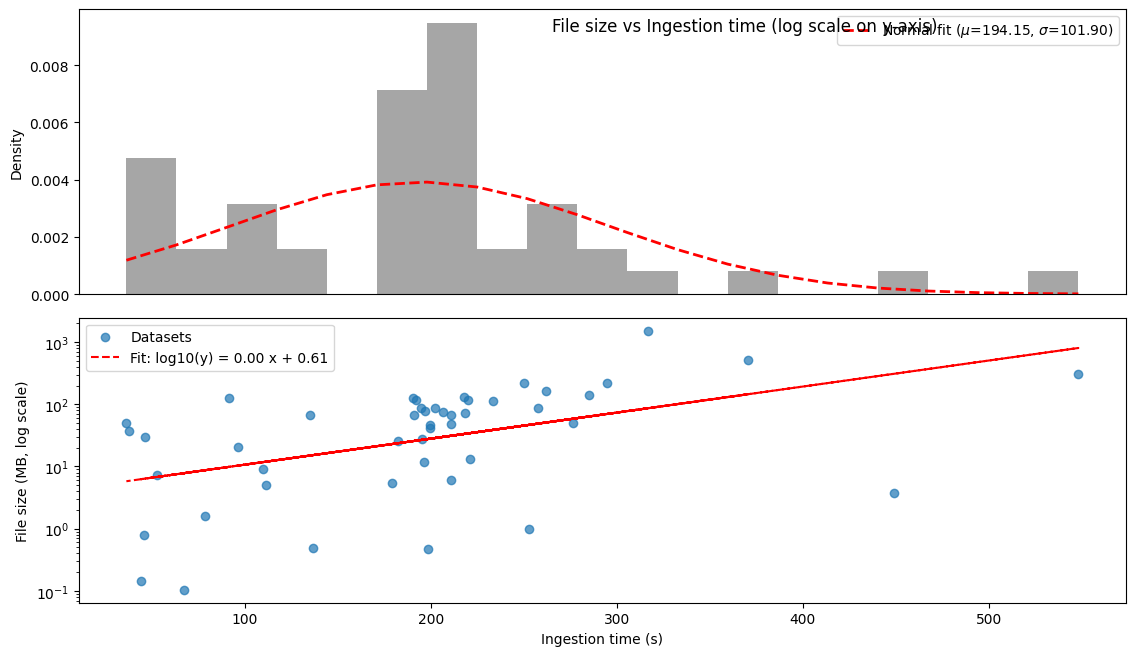

In [11]:
x = df_worker8["total_sec"]   # 横轴改为总 ingestion 时间
y = df_worker8["fileSizeMB"]  # 纵轴改为文件大小

# 创建画布
fig = plt.figure(figsize=(15,7))
gs = gridspec.GridSpec(4, 4, figure=fig)

ax_main = fig.add_subplot(gs[2:,:-1])
ax_xhist = fig.add_subplot(gs[0:2,:-1], sharex=ax_main)  # 上方直方图

# ========= 主散点图 =========
ax_main.scatter(x, y, alpha=0.7, label="Datasets")

# 拟合（在 log(y) 上拟合，但 x 保持原始值 -> 半对数回归）
logy = np.log10(y)
coeffs = np.polyfit(x, logy, 1)
fit_logy = coeffs[1] + coeffs[0]*x
fit_y = 10**fit_logy
ax_main.plot(x, fit_y, color="red", linestyle="--", 
             label=f"Fit: log10(y) = {coeffs[0]:.2f} x + {coeffs[1]:.2f}")

ax_main.set_yscale("log")
ax_main.set_xlabel("Ingestion time (s)")
ax_main.set_ylabel("File size (MB, log scale)")
ax_main.legend()

# ========= 上方直方图（x 分布：ingestion time） =========
bins_x = np.linspace(x.min(), x.max(), 20)
ax_xhist.hist(x, bins=bins_x, color="grey", alpha=0.7, density=True)
ax_xhist.set_ylabel("Density")
ax_xhist.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

# 对 x 拟合正态分布
mu_x, std_x = norm.fit(x)
pdf_x = norm.pdf(bins_x, mu_x, std_x)
ax_xhist.plot(bins_x, pdf_x, 'r--', linewidth=2, 
              label=rf"Normal fit ($\mu$={mu_x:.2f}, $\sigma$={std_x:.2f})")
ax_xhist.legend()

plt.suptitle("File size vs Ingestion time (log scale on y-axis)", y=0.92)
plt.tight_layout()
plt.savefig("../visualisation/plot_histogram_total.png", dpi=300, bbox_inches="tight")
plt.show()

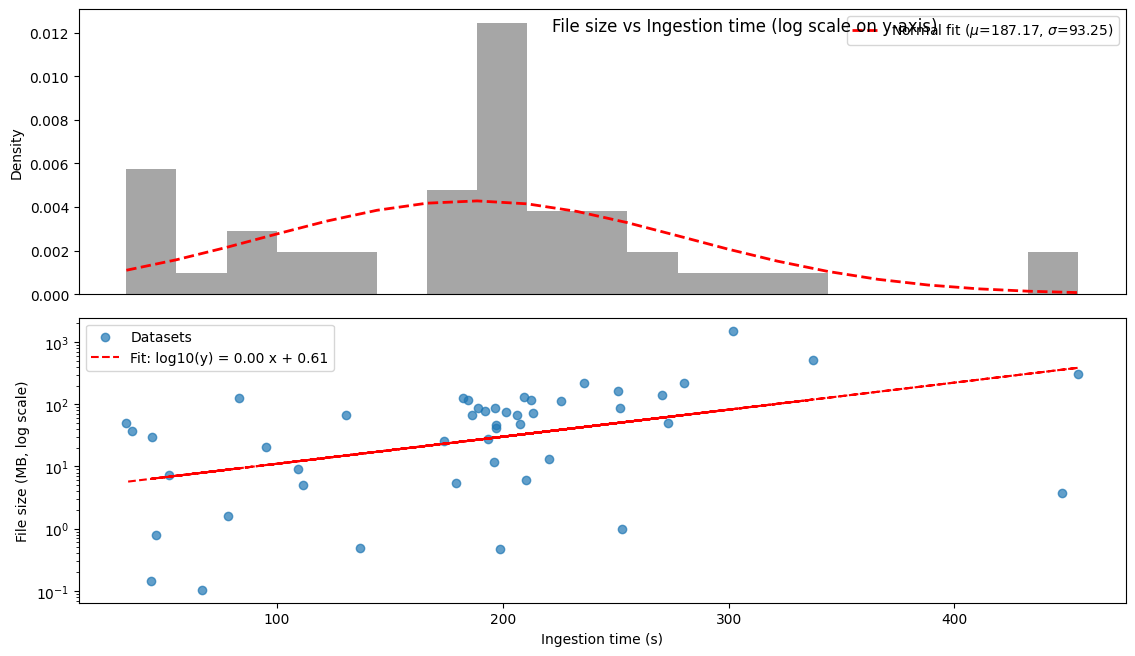

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.stats import norm

x = df_worker8["total_meta_sec"]   # 改为时间在 x 轴
y = df_worker8["fileSizeMB"]       # 改为文件大小在 y 轴

# 创建画布
fig = plt.figure(figsize=(15,7))
gs = gridspec.GridSpec(4, 4, figure=fig)

ax_main = fig.add_subplot(gs[2:,:-1])
ax_xhist = fig.add_subplot(gs[0:2,:-1], sharex=ax_main)  # 上方直方图

# ========= 主散点图 =========
ax_main.scatter(x, y, alpha=0.7, label="Datasets")

# 在 log(y) 上拟合（半对数回归，y 取对数）
logy = np.log10(y)
coeffs = np.polyfit(x, logy, 1)
fit_logy = coeffs[1] + coeffs[0]*x
fit_y = 10**fit_logy
ax_main.plot(x, fit_y, color="red", linestyle="--", 
             label=f"Fit: log10(y) = {coeffs[0]:.2f} x + {coeffs[1]:.2f}")

ax_main.set_yscale("log")
ax_main.set_xlabel("Ingestion time (s)")
ax_main.set_ylabel("File size (MB, log scale)")
ax_main.legend()

# ========= 上方直方图（x 分布：时间分布） =========
bins_x = np.linspace(x.min(), x.max(), 20)
ax_xhist.hist(x, bins=bins_x, color="grey", alpha=0.7, density=True)
ax_xhist.set_ylabel("Density")
ax_xhist.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)

# 拟合正态分布 (x = ingestion time)
mu_x, std_x = norm.fit(x)
pdf_x = norm.pdf(bins_x, mu_x, std_x)
ax_xhist.plot(bins_x, pdf_x, 'r--', linewidth=2, 
              label=rf"Normal fit ($\mu$={mu_x:.2f}, $\sigma$={std_x:.2f})")
ax_xhist.legend()

plt.suptitle("File size vs Ingestion time (log scale on y-axis)", y=0.92)
plt.tight_layout()
plt.savefig("../visualisation/plot_histogram_meta.png", dpi=300, bbox_inches="tight")
plt.show()

In [13]:
from scipy.stats import skew, kurtosis

# 均值和方差
mu_y, std_y = norm.fit(y)
var_y = std_y**2

# 偏度和峰度
skew_y = skew(y)
kurt_y = kurtosis(y)  # 默认是 Fisher 定义（正态分布=0）
# 如果你想要 Pearson 定义（正态分布=3），加上 fisher=False
kurt_y_pearson = kurtosis(y, fisher=False)

print(f"Mean: {mu_y:.2f}")
print(f"Variance: {var_y:.2f}")
print(f"Std Dev: {std_y:.2f}")
print(f"Skewness: {skew_y:.2f}")
print(f"Kurtosis (Fisher=0): {kurt_y:.2f}")
print(f"Kurtosis (Pearson=3): {kurt_y_pearson:.2f}")


Mean: 105.34
Variance: 52660.67
Std Dev: 229.48
Skewness: 5.21
Kurtosis (Fisher=0): 28.97
Kurtosis (Pearson=3): 31.97


In [14]:
df_worker8.rename(columns={"read_df_sec": "file_parsing_sec"}, inplace=True)

In [16]:
cols = ["file_parsing_sec", "semantic_helper_sec", "classify_attributes_sec", "scopes_granularities_sec", "find_common_theme_sec", "transform_result_sec", "total_meta_sec"]
df_summary = df_worker8[cols].agg(["min", "max", "mean", "median", "std"])
df_summary

,file_parsing_sec,semantic_helper_sec,classify_attributes_sec,scopes_granularities_sec,find_common_theme_sec,transform_result_sec,total_meta_sec
min,0.041028,22.694778,0.621597,0.000033,0.000004,0.000067,33.236596
max,167.288902,300.039289,108.815605,2.434033,0.000621,0.000538,454.926648
mean,19.835160,150.938753,15.856210,0.373331,0.000076,0.000165,187.172226
median,6.483960,175.609337,9.224700,0.198350,0.000053,0.000135,196.340502
std,35.267531,73.017813,19.220951,0.489472,0.000098,0.000097,94.258085


In [16]:
# df_summary.to_csv("../visualisation/summary_stats.csv")

In [17]:
df_summary = df_worker8[cols].apply(pd.to_numeric, errors="coerce").agg(
    ["min","max","mean","median","std"]
)
df_summary_ms = (df_summary * 1000).round(1)
df_summary_ms

,file_parsing_sec,semantic_helper_sec,classify_attributes_sec,scopes_granularities_sec,find_common_theme_sec,transform_result_sec,total_meta_sec
min,41.0,22694.8,621.6,0.0,0.0,0.1,33236.6
max,167288.9,300039.3,108815.6,2434.0,0.6,0.5,454926.6
mean,19835.2,150938.8,15856.2,373.3,0.1,0.2,187172.2
median,6484.0,175609.3,9224.7,198.4,0.1,0.1,196340.5
std,35267.5,73017.8,19221.0,489.5,0.1,0.1,94258.1


In [18]:
df_summary.to_csv("../visualisation/summary_stats_ms.csv")

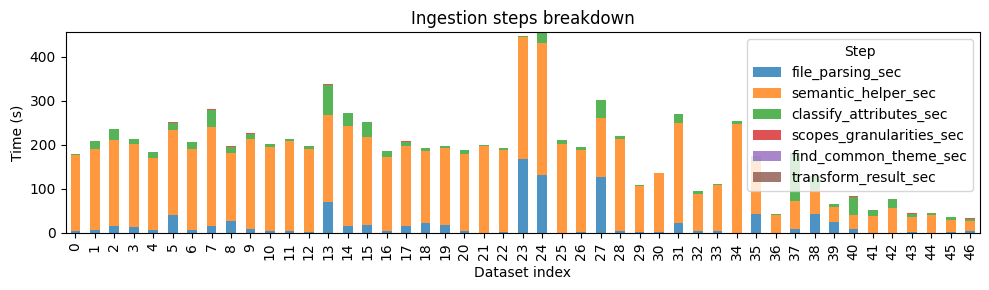

In [17]:
# 选择需要的步骤列
steps = ["file_parsing_sec", "semantic_helper_sec", "classify_attributes_sec", "scopes_granularities_sec", "find_common_theme_sec", "transform_result_sec"]

df_steps = df_worker8[steps]

# 画堆叠柱状图
ax = df_steps.plot(kind="bar", stacked=True, figsize=(10,3), alpha=0.8)

plt.xlabel("Dataset index")
plt.ylabel("Time (s)")
plt.title("Ingestion steps breakdown")
plt.legend(title="Step")
plt.tight_layout()
plt.savefig("../visualisation/histogram_ratio.png", dpi=300, bbox_inches="tight")
plt.show()

In [18]:
cols = ["transfer_final_sec", "total_meta_sec"]
df_percent = df_worker8[cols].div(df_worker8["total_sec"], axis=0)

df_percent_avg = df_percent.agg(["mean", "median", "std"])
df_percent_avg

,transfer_final_sec,total_meta_sec
mean,0.029563,0.970437
median,0.022186,0.977814
std,0.032151,0.032151


In [19]:
# df_percent_avg.to_csv("../visualisation/two_stage_ratio.csv")

In [20]:
cols = ["file_parsing_sec", "semantic_helper_sec", "classify_attributes_sec", "scopes_granularities_sec", "find_common_theme_sec", "transform_result_sec", ]
df_percent_meta = df_worker8[cols].div(df_worker8["total_meta_sec"], axis=0)

df_percent_meta_avg = df_percent_meta.agg(["mean", "median", "std"])
df_percent_meta_avg

,file_parsing_sec,semantic_helper_sec,classify_attributes_sec,scopes_granularities_sec,find_common_theme_sec,transform_result_sec
mean,0.087100,0.809725,0.098479,0.002946,7.265650e-07,1.141244e-06
median,0.039903,0.873859,0.068838,0.001276,2.647327e-07,7.984961e-07
std,0.108418,0.169896,0.114167,0.005419,2.507616e-06,1.001273e-06


In [23]:
# df_percent_meta_avg.to_csv("../visualisation/meta_ratio.csv")

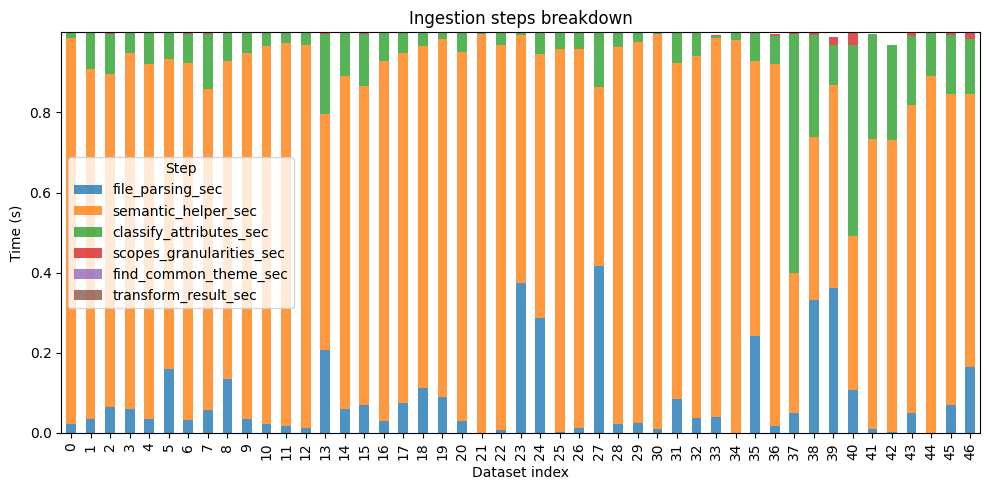

In [26]:
# 选择需要的步骤列
steps = ["file_parsing_sec", "semantic_helper_sec", "classify_attributes_sec", "scopes_granularities_sec",
         "find_common_theme_sec", "transform_result_sec"]

df_steps = df_percent_meta[steps]

# 画堆叠柱状图
ax = df_steps.plot(kind="bar", stacked=True, figsize=(10, 5), alpha=0.8)

plt.xlabel("Dataset index")
plt.ylabel("Time (s)")
plt.title("Ingestion steps breakdown")
plt.legend(title="Step")
plt.tight_layout()
plt.show()

In [16]:
df_perf = pd.read_json(r"C:\Users\ADMrechbay20\PycharmProjects\metadata capture\metadata\perf\rpls2021_geolocalise_OD_REG11.csv.perf.json")
df_perf

,datasetId,sourcePath,fileSizeBytes,timings,executedAt
read_df_sec,564f17fd7c758ee6,C:\Users\ADMrechbay20\PycharmProjects\metadata...,531199492,476.283368,2025-09-09T12:35:02Z
semantic_helper_sec,564f17fd7c758ee6,C:\Users\ADMrechbay20\PycharmProjects\metadata...,531199492,185.217609,2025-09-09T12:35:02Z
classify_attributes_sec,564f17fd7c758ee6,C:\Users\ADMrechbay20\PycharmProjects\metadata...,531199492,166.410160,2025-09-09T12:35:02Z
scopes_granularities_sec,564f17fd7c758ee6,C:\Users\ADMrechbay20\PycharmProjects\metadata...,531199492,2.099974,2025-09-09T12:35:02Z
find_common_theme_sec,564f17fd7c758ee6,C:\Users\ADMrechbay20\PycharmProjects\metadata...,531199492,0.000072,2025-09-09T12:35:02Z
transform_result_sec,564f17fd7c758ee6,C:\Users\ADMrechbay20\PycharmProjects\metadata...,531199492,0.000176,2025-09-09T12:35:02Z
total_sec,564f17fd7c758ee6,C:\Users\ADMrechbay20\PycharmProjects\metadata...,531199492,644.881357,2025-09-09T12:35:02Z


In [27]:
cata_path = r"C:\Users\ADMrechbay20\PycharmProjects\metadata capture\catalog.json"
cata = json.loads(open(cata_path).read())
cata

{'datasets': [{'id': 'cf8b280fb50ad9e3',
   'title': 'actphys-sedent.csv',
   'sourcePath': 'C:\\Users\\ADMrechbay20\\PycharmProjects\\metadata capture\\data\\actphys-sedent.csv',
   'sourceMtime': 1756894817,
   'metadataPath': '../metadata\\actphys-sedent.csv.metadata.json',
   'status': 'ok',
   'fileType': '.csv',
   'dataFormat': 'structured',
   'updateFrequency': '',
   'theme': ['Well-Being > Environment > Infrastructure > Transport',
    'Well-Being > Environment > Participation in recreational and leisure activities',
    'Well-Being > Level of Independence > Activities of daily living > Taking care of oneself',
    'Well-Being > Level of Independence > Jobs and Employment > Employment rate',
    'Well-Being > Level of Independence > Mobility',
    'Well-Being > Work-Life Balance > Leisure time'],
   'spatialGranularity': None,
   'temporalGranularity': None,
   'spatialScope': None,
   'temporalScope': None,
   'fileSizeBytes': 1036193,
   'fileSizeHuman': '1011.91 KB',
   '

In [15]:
datasets = cata['datasets']
datasets

[{'id': 'cf8b280fb50ad9e3',
  'title': 'actphys-sedent.csv',
  'sourcePath': 'C:\\Users\\ADMrechbay20\\PycharmProjects\\metadata capture\\data\\actphys-sedent.csv',
  'sourceMtime': 1756894817,
  'metadataPath': '../metadata\\actphys-sedent.csv.metadata.json',
  'status': 'ok',
  'fileType': '.csv',
  'dataFormat': 'structured',
  'updateFrequency': '',
  'theme': ['Well-Being > Environment > Infrastructure > Transport',
   'Well-Being > Environment > Participation in recreational and leisure activities',
   'Well-Being > Level of Independence > Activities of daily living > Taking care of oneself',
   'Well-Being > Level of Independence > Jobs and Employment > Employment rate',
   'Well-Being > Level of Independence > Mobility',
   'Well-Being > Work-Life Balance > Leisure time'],
  'spatialGranularity': None,
  'temporalGranularity': None,
  'spatialScope': None,
  'temporalScope': None,
  'fileSizeBytes': 1036193,
  'fileSizeHuman': '1011.91 KB',
  'nRows': 4725,
  'nCols': 93,
  'nR

In [21]:
ds = datasets[0]

themes = []
themes.extend(ds["theme"])

themes

['Well-Being > Environment > Infrastructure > Transport',
 'Well-Being > Environment > Participation in recreational and leisure activities',
 'Well-Being > Level of Independence > Activities of daily living > Taking care of oneself',
 'Well-Being > Level of Independence > Jobs and Employment > Employment rate',
 'Well-Being > Level of Independence > Mobility',
 'Well-Being > Work-Life Balance > Leisure time']

In [24]:
themes = []
for dataset in datasets:
    theme = dataset['theme']
    themes.extend(dataset['theme'] if dataset['theme'] else [])

themes=set(themes)
themes



{'Well-Being > Civic Engagement and Governance > Governance quality > Trust in institutions',
 'Well-Being > Environment > Comfort and security',
 'Well-Being > Environment > Domestic environment > Available equipment',
 'Well-Being > Environment > Domestic environment > Available space',
 'Well-Being > Environment > Domestic environment > Building construction quality',
 'Well-Being > Environment > Health care and social care > Accessibility',
 'Well-Being > Environment > Infrastructure',
 'Well-Being > Environment > Infrastructure > Electricity',
 'Well-Being > Environment > Infrastructure > Transport',
 'Well-Being > Environment > Opportunities to acquire new information and skills',
 'Well-Being > Environment > Participation in recreational and leisure activities',
 'Well-Being > Environment > Physical environment > Climate',
 'Well-Being > Environment > Urbanisation level',
 'Well-Being > Level of Independence > Activities of daily living > Taking care of oneself',
 'Well-Being > 

In [25]:
df_theme = pd.DataFrame([t.split(" > ") for t in themes])
df_theme

,0,1,2,3,4
0,Well-Being,Level of Independence,Activities of daily living,Taking care of oneself,None
1,Well-Being,Environment,Health care and social care,Accessibility,None
2,Well-being,Environment,Infrastructure,Transport,None
3,Well-being,Environment,Domestic environment,Available space,None
4,Well-Being,Level of Independence,Income and Wealth,Financial resources,Independence
5,Well-being,Environment,Physical environment,Climate,None
6,Well-Being,Environment,Infrastructure,Transport,None
7,Well-Being,Environment,Urbanisation level,None,None
8,Well-Being,Level of Independence,Education and Skills,Upper secondary attainment,None
9,Well-being,Level of Independence,Income and Wealth,Relative poverty rate,None


In [31]:
df_theme[1].unique()

array(['Level of Independence', 'Environment', 'Work-Life Balance',
       'Civic Engagement and Governance'], dtype=object)

In [29]:
df_theme[2].nunique()

15

In [30]:
df_theme[3].nunique()

16

In [1]:

#file reader
def excel_EL(file_path):
    """Read Excel file"""
    df = pd.read_excel(file_path, header=None, nrows=1000)
    # Count rows with data
    row_counts = df.count(axis=1)
    # Check if the DataFrame is empty
    if row_counts.empty:
        raise ValueError("DataFrame is empty or contains no valid data.")
    # Find the row with the fewest null values
    max_row_count = row_counts.max()
    if max_row_count == 0:
        raise ValueError("All rows are empty.")
    # Set this row as the header and retrieve the table below it
    first_row = row_counts.idxmax() + 1
    # Read data from the title line
    df = pd.read_excel(file_path, header=first_row)
    return df

def csv_EL(file_path):
    """Read CSV with various encodings and delimiters"""
    try:
        df = pd.read_csv(file_path, low_memory=False, on_bad_lines='skip')
    except:
        df = pd.read_csv(file_path, encoding='latin1', low_memory=False, on_bad_lines='skip')
    if df.shape[1] == 1:
        try:
            df = pd.read_csv(file_path, sep=';', low_memory=False, on_bad_lines='skip')
        except:
            df = pd.read_csv(file_path, encoding='latin1', sep=';', low_memory=False, on_bad_lines='skip')
    return df

def geojson_EL(file_path):
    """Read GeoJSON data"""
    gdf = gpd.read_file(file_path)
    df = gdf.to_pandas()
    return df

def shapefile_EL(zip_file_path):
    """Read shape file data"""
    extracted_folder = os.getcwd()
    # Unzip the file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_folder)

    # Find Shapefile within extracted files
    shapefile_path = None
    for root, dirs, files in os.walk(extracted_folder):
        for file in files:
            if file.endswith('.shp'):
                shapefile_path = os.path.join(root, file)
                break

    if shapefile_path:
        gdf = gpd.read_file(shapefile_path)
        df = gdf.to_pandas()
    return df

def json_EL(file_path):
    """Read json data"""
    df = pd.read_json(file_path, lines=True)
    return df

dict_EL = {
    '.xlsx': excel_EL,
    '.csv': csv_EL,
    '.geojson': geojson_EL,
    '.zip': shapefile_EL,
    '.json': json_EL
}

In [2]:
path = r"C:\Users\ADMrechbay20\OneDrive\桌面\Données\carte\georef-france-iris.csv"
df=csv_EL(path)
df

,Geo Point,Geo Shape,Année,Code Officiel Région,Nom Officiel Région,Code Officiel Département,Nom Officiel Département,Code Officiel Arrondissement départemental,Nom Officiel Arrondissement départemental,Code Officiel Zone emploi 2020,...,Nom Officiel IRIS,Nom Officiel IRIS Majuscule,Nom Officiel IRIS Minuscule,Code Iso 3166-3 Zone,Type,Code Grand Quartier,Libellé Grand Quartier,Fait Partie d'une CTU,Code Officiel Zone emploi 2010,Nom Officiel Zone emploi 2010
0,"48.14576189723401, 4.1027965858326665","{""coordinates"": [[[4.094075268384703, 48.15248...",2024,44,Grand Est,10,Aube,103,Troyes,4425.0,...,La Vendue-Mignot (commune non irisée),LA VENDUE-MIGNOT (COMMUNE NON IRISÉE),la vendue-mignot (commune non irisée),FXX,commune,1040200,Sans objet ou non disponible,Non,NaN,NaN
1,"43.525854416299744, 5.415381822275475","{""coordinates"": [[[5.413410670656772, 43.52648...",2024,93,Provence-Alpes-Côte d'Azur,13,Bouches-du-Rhône,131,Aix-en-Provence,9301.0,...,Jas 3,JAS 3,jas 3,FXX,iris d'habitat,1300107,Ouest 2,Non,NaN,NaN
2,"45.13039155366611, 2.2488491368389374","{""coordinates"": [[[[2.179075405192196, 45.1363...",2024,84,Auvergne-Rhône-Alpes,15,Cantal,152,Mauriac,63.0,...,Pleaux (commune non irisée),PLEAUX (COMMUNE NON IRISÉE),pleaux (commune non irisée),FXX,commune,1515300,Sans objet ou non disponible,Non,NaN,NaN
3,"45.53085449316326, -0.5560779891787268","{""coordinates"": [[[-0.570748020089974, 45.5416...",2024,75,Nouvelle-Aquitaine,17,Charente-Maritime,171,Jonzac,7528.0,...,Belluire (commune non irisée),BELLUIRE (COMMUNE NON IRISÉE),belluire (commune non irisée),FXX,commune,1703900,Sans objet ou non disponible,Non,NaN,NaN
4,"46.83361568828208, 2.8082692420677953","{""coordinates"": [[[2.756142167693057, 46.84977...",2024,24,Centre-Val de Loire,18,Cher,182,Saint-Amand-Montrond,60.0,...,Givardon (commune non irisée),GIVARDON (COMMUNE NON IRISÉE),givardon (commune non irisée),FXX,commune,1810200,Sans objet ou non disponible,Non,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49415,"50.479526568834906, 2.1001379891540295","{""coordinates"": [[[2.087537997297523, 50.48476...",2024,32,Hauts-de-France,62,Pas-de-Calais,624,Montreuil,3219.0,...,Avondance (commune non irisée),AVONDANCE (COMMUNE NON IRISÉE),avondance (commune non irisée),FXX,commune,6206600,Sans objet ou non disponible,Non,NaN,NaN
49416,"50.541107755239054, 1.9093735594808074","{""coordinates"": [[[1.884866446395516, 50.55086...",2024,32,Hauts-de-France,62,Pas-de-Calais,624,Montreuil,3204.0,...,Bimont (commune non irisée),BIMONT (COMMUNE NON IRISÉE),bimont (commune non irisée),FXX,commune,6213400,Sans objet ou non disponible,Non,NaN,NaN
49417,"46.02566286850849, 3.4862553596856287","{""coordinates"": [[[3.471697766536422, 46.04019...",2024,84,Auvergne-Rhône-Alpes,03,Allier,033,Vichy,8432.0,...,Mariol (commune non irisée),MARIOL (COMMUNE NON IRISÉE),mariol (commune non irisée),FXX,commune,0316300,Sans objet ou non disponible,Non,NaN,NaN
49418,"43.612022379039864, 6.911664200237345","{""coordinates"": [[[6.894315310510735, 43.61143...",2024,93,Provence-Alpes-Côte d'Azur,06,Alpes-Maritimes,061,Grasse,9304.0,...,Auribeau-sur-Siagne (commune non irisée),AURIBEAU-SUR-SIAGNE (COMMUNE NON IRISÉE),auribeau-sur-siagne (commune non irisée),FXX,commune,0600700,Sans objet ou non disponible,Non,NaN,NaN


In [3]:
path2 = r"C:\Users\ADMrechbay20\OneDrive\桌面\Données\carte\communes-france-2025.csv"
df2=csv_EL(path2)
df2

,Unnamed: 0,code_insee,nom_standard,nom_sans_pronom,nom_a,nom_de,nom_sans_accent,nom_standard_majuscule,typecom,typecom_texte,...,longitude_mairie,latitude_centre,longitude_centre,grille_densite,grille_densite_texte,niveau_equipements_services,niveau_equipements_services_texte,gentile,url_wikipedia,url_villedereve
0,0,01001,L'Abergement-Clémenciat,Abergement-Clémenciat,à Abergement-Clémenciat,de l'Abergement-Clémenciat,l-abergement-clemenciat,L'ABERGEMENT-CLÉMENCIAT,COM,commune,...,4.921,46.153,4.926,6,Rural à habitat dispersé,0.0,communes non pôle,NaN,https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01001-l-abergemen...
1,1,01002,L'Abergement-de-Varey,Abergement-de-Varey,à Abergement-de-Varey,de l'Abergement-de-Varey,l-abergement-de-varey,L'ABERGEMENT-DE-VAREY,COM,commune,...,5.423,46.009,5.428,6,Rural à habitat dispersé,0.0,communes non pôle,"Abergementais, Abergementaises",https://fr.wikipedia.org/wiki/fr:L'Abergement-...,https://villedereve.fr/ville/01002-l-abergemen...
2,2,01004,Ambérieu-en-Bugey,Ambérieu-en-Bugey,à Ambérieu-en-Bugey,d'Ambérieu-en-Bugey,amberieu-en-bugey,AMBÉRIEU-EN-BUGEY,COM,commune,...,5.360,45.961,5.373,2,Centres urbains intermédiaires,3.0,centres structurants d'équipements et de services,"Ambarrois, Ambarroises",https://fr.wikipedia.org/wiki/fr:Ambérieu-en-B...,https://villedereve.fr/ville/01004-amberieu-en...
3,3,01005,Ambérieux-en-Dombes,Ambérieux-en-Dombes,à Ambérieux-en-Dombes,d'Ambérieux-en-Dombes,amberieux-en-dombes,AMBÉRIEUX-EN-DOMBES,COM,commune,...,4.903,45.996,4.912,5,Bourgs ruraux,1.0,centres locaux d'équipements et de services,Ambarrois,https://fr.wikipedia.org/wiki/fr:Ambérieux-en-...,https://villedereve.fr/ville/01005-amberieux-e...
4,4,01006,Ambléon,Ambléon,à Ambléon,d'Ambléon,ambleon,AMBLÉON,COM,commune,...,5.601,45.750,5.594,6,Rural à habitat dispersé,0.0,communes non pôle,Ambléonais,https://fr.wikipedia.org/wiki/fr:Ambléon,https://villedereve.fr/ville/01006-ambleon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34930,34930,97613,M'Tsangamouji,M'Tsangamouji,à M'Tsangamouji,de M'Tsangamouji,m-tsangamouji,M'TSANGAMOUJI,COM,commune,...,45.084,-12.751,45.087,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:M'Tsangamouji,https://villedereve.fr/ville/97613-m-tsangamouji
34931,34931,97614,Ouangani,Ouangani,à Ouangani,d'Ouangani,ouangani,OUANGANI,COM,commune,...,45.139,-12.837,45.138,3,Petites villes,NaN,NaN,NaN,https://fr.wikipedia.org/wiki/fr:Ouangani,https://villedereve.fr/ville/97614-ouangani
34932,34932,97615,Pamandzi,Pamandzi,à Pamandzi,de Pamandzi,pamandzi,PAMANDZI,COM,commune,...,45.275,-12.796,45.284,2,Centres urbains intermédiaires,NaN,NaN,Pamandziens,https://fr.wikipedia.org/wiki/fr:Pamandzi,https://villedereve.fr/ville/97615-pamandzi
34933,34933,97616,Sada,Sada,à Sada,de Sada,sada,SADA,COM,commune,...,45.106,-12.861,45.119,2,Centres urbains intermédiaires,NaN,NaN,Sadois,https://fr.wikipedia.org/wiki/fr:Sada (Mayotte),https://villedereve.fr/ville/97616-sada


In [4]:
df3 = df2[['code_insee', 'academie_code', 'academie_nom', 'canton_code', 'canton_nom']].rename(columns={'code_insee':"Code Officiel Commune", 'academie_code': "Code Officiel Académie", 'academie_nom': "Nom Officiel Académie", 'canton_code': "Code Officiel Canton", 'canton_nom': "Nom Officiel Canton"})
df3

,Code Officiel Commune,Code Officiel Académie,Nom Officiel Académie,Code Officiel Canton,Nom Officiel Canton
0,01001,10,Lyon,0108,Châtillon-sur-Chalaronne
1,01002,10,Lyon,0101,Ambérieu-en-Bugey
2,01004,10,Lyon,0101,Ambérieu-en-Bugey
3,01005,10,Lyon,0122,Villars-les-Dombes
4,01006,10,Lyon,0104,Belley
...,...,...,...,...,...
34930,97613,43,Mayotte,97613.0,Tsingoni
34931,97614,43,Mayotte,97610.0,Ouangani
34932,97615,43,Mayotte,97611.0,Pamandzi
34933,97616,43,Mayotte,97612.0,Sada


In [17]:
df_all = pd.merge(df, df3, "left", on="Code Officiel Commune")
df_all

,Geo Point,Geo Shape,Année,Code Officiel Région,Nom Officiel Région,Code Officiel Département,Nom Officiel Département,Code Officiel Arrondissement départemental,Nom Officiel Arrondissement départemental,Code Officiel Zone emploi 2020,...,Type,Code Grand Quartier,Libellé Grand Quartier,Fait Partie d'une CTU,Code Officiel Zone emploi 2010,Nom Officiel Zone emploi 2010,Code Officiel Académie,Nom Officiel Académie,Code Officiel Canton,Nom Officiel Canton
0,"48.14576189723401, 4.1027965858326665","{""coordinates"": [[[4.094075268384703, 48.15248...",2024,44,Grand Est,10,Aube,103,Troyes,4425.0,...,commune,1040200,Sans objet ou non disponible,Non,NaN,NaN,19.0,Reims,1008,Les Riceys
1,"43.525854416299744, 5.415381822275475","{""coordinates"": [[[5.413410670656772, 43.52648...",2024,93,Provence-Alpes-Côte d'Azur,13,Bouches-du-Rhône,131,Aix-en-Provence,9301.0,...,iris d'habitat,1300107,Ouest 2,Non,NaN,NaN,2.0,Aix-Marseille,1397,Aix-en-Provence
2,"45.13039155366611, 2.2488491368389374","{""coordinates"": [[[[2.179075405192196, 45.1363...",2024,84,Auvergne-Rhône-Alpes,15,Cantal,152,Mauriac,63.0,...,commune,1515300,Sans objet ou non disponible,Non,NaN,NaN,6.0,Clermont-Ferrand,1505,Mauriac
3,"45.53085449316326, -0.5560779891787268","{""coordinates"": [[[-0.570748020089974, 45.5416...",2024,75,Nouvelle-Aquitaine,17,Charente-Maritime,171,Jonzac,7528.0,...,commune,1703900,Sans objet ou non disponible,Non,NaN,NaN,13.0,Poitiers,1712,Pons
4,"46.83361568828208, 2.8082692420677953","{""coordinates"": [[[2.756142167693057, 46.84977...",2024,24,Centre-Val de Loire,18,Cher,182,Saint-Amand-Montrond,60.0,...,commune,1810200,Sans objet ou non disponible,Non,NaN,NaN,18.0,Orléans-Tours,1809,Dun-sur-Auron
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49415,"50.479526568834906, 2.1001379891540295","{""coordinates"": [[[2.087537997297523, 50.48476...",2024,32,Hauts-de-France,62,Pas-de-Calais,624,Montreuil,3219.0,...,commune,6206600,Sans objet ou non disponible,Non,NaN,NaN,9.0,Lille,6225,Fruges
49416,"50.541107755239054, 1.9093735594808074","{""coordinates"": [[[1.884866446395516, 50.55086...",2024,32,Hauts-de-France,62,Pas-de-Calais,624,Montreuil,3204.0,...,commune,6213400,Sans objet ou non disponible,Non,NaN,NaN,9.0,Lille,6233,Lumbres
49417,"46.02566286850849, 3.4862553596856287","{""coordinates"": [[[3.471697766536422, 46.04019...",2024,84,Auvergne-Rhône-Alpes,03,Allier,033,Vichy,8432.0,...,commune,0316300,Sans objet ou non disponible,Non,NaN,NaN,6.0,Clermont-Ferrand,0308,Lapalisse
49418,"43.612022379039864, 6.911664200237345","{""coordinates"": [[[6.894315310510735, 43.61143...",2024,93,Provence-Alpes-Côte d'Azur,06,Alpes-Maritimes,061,Grasse,9304.0,...,commune,0600700,Sans objet ou non disponible,Non,NaN,NaN,23.0,Nice,0613,Mandelieu-la-Napoule


In [20]:
res = df_all.groupby("Code Officiel Département")["Code Officiel Académie"].nunique()
res = res[res>1]
res

Series([], Name: Code Officiel Académie, dtype: int64)